# Deep Learning

## Yapay Sinir Ağları

In [1]:
# kütüphaneleri içeri aktarıyoruz
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# gereksiz uyarıları kapatıyoruz
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from keras.datasets import mnist

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


#### MNIST datasetindeki 0 ve 1 olanları alma

In [4]:
x_train2 = []
y_train2 = []
x_test2 = []
y_test2 = []
for i in range(y_train.shape[0]):
    if y_train[i] == 1 or y_train[i] == 0:
        x_train2.append(x_train[i])
        y_train2.append(y_train[i])
        
for i in range(y_test.shape[0]):
    if y_test[i] == 1 or y_test[i] == 0:
        x_test2.append(x_test[i])
        y_test2.append(y_test[i])

In [5]:
x_train = np.array(x_train2)
y_train = np.array(y_train2)
x_test = np.array(x_test2)
y_test = np.array(y_test2)


In [6]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(12665, 28, 28)
(12665,)
(2115, 28, 28)
(2115,)


### Verileri Görselleştiriyoruz

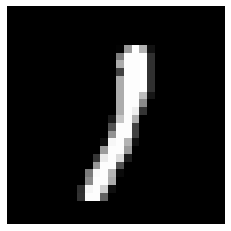

In [7]:
plt.figure()
plt.imshow(x_train[765],cmap="gray")
plt.axis("off")
plt.show()

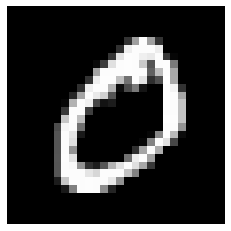

In [8]:
plt.figure()
plt.imshow(x_train[0],cmap="gray")
plt.axis("off")
plt.show()

In [9]:
import random

# ilklendirme
def layerSayisiniParametreleriIlklendir(x_train,y_train):
    parameters = {
        "weight1":np.random.randn(3,x_train.shape[0]) * 0.1,
        "bias1": np.zeros((3,1)),
        "weight2":np.random.randn(3,y_train.shape[0]) * 0.1,
        "bias2": np.zeros(y_train.shape[0],1)}
    return parameters

In [10]:
def sigmoid(z):
    return 1/(1+np.exp(-z))


In [11]:
# yapay sinir ağı kütüphaneleri
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense

In [12]:
#x_train = x_train.reshape(x_train.shape[0],28,28,1)
#x_test = x_train.reshape(x_train.shape[0],28,28,1)


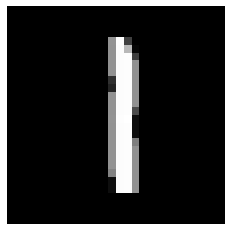

1

In [13]:
plt.figure()
plt.imshow(x_train[987],cmap="gray")
plt.axis("off")
plt.show()
y_train[987]

## Model Kurulumu

In [15]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(64,activation="relu"),


    tf.keras.layers.Dense(10,activation="sigmoid")
])

model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])



# Evrişimsel Sinir Ağları

In [17]:
# kütüphaneleri içeri aktarıyoruz
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# gereksiz uyarıları kapatıyoruz
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from keras.datasets import mnist

In [72]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [73]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


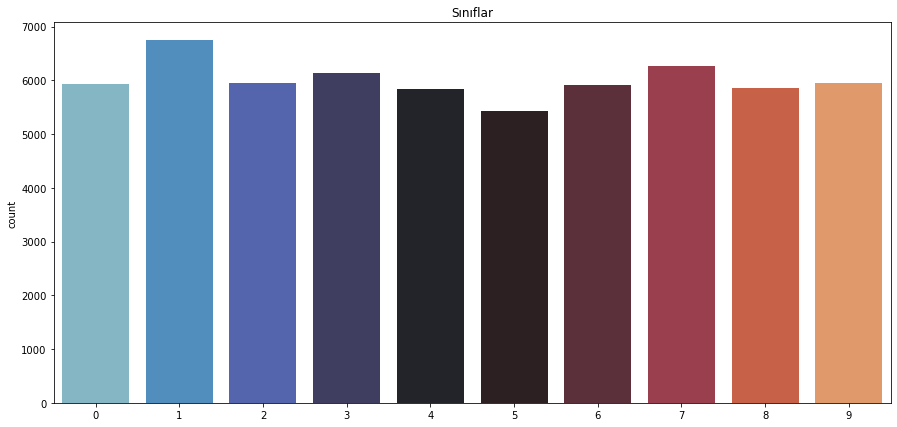

In [74]:
plt.figure(figsize=(15,7))
g = sns.countplot(y_train,palette="icefire")
plt.title("Sınıflar")
plt.show()


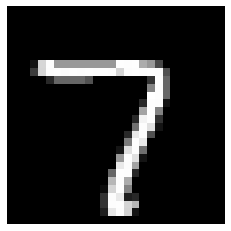

7

In [75]:
# veriyi görselleştiriyoruz
plt.figure()
plt.imshow(x_train[84],cmap="gray")
plt.axis("off")
plt.show()
y_train[84]

### Normaleştirme Yeniden Şekillendirme ve Etiket Kodlama

In [76]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [77]:
# verimizi modele verilmeye uygun boyutlara getiriyourz
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [78]:
# etiket kodlama
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train,num_classes = 10)
y_test = to_categorical(y_test,num_classes=10)

In [79]:
x_train.shape

(60000, 28, 28, 1)

### Kütüphaneleri Yükleyelim

In [80]:
from sklearn.metrics import confusion_matrix
import itertools
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [81]:
model = Sequential()
#
model.add(Conv2D(filters=8,kernel_size=(5,5),padding="same",activation="relu",input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters=16,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# tam bağlantı
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10,activation="softmax"))

### Modelin Derlenmesi

In [82]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [83]:
epochs = 10
batch_size = 256

## Veri Artırma

In [84]:
# data agumentation
datagen = ImageDataGenerator(
    featurewise_center=False,# girdi ortalamasını veri kümesi üzerinden 0 olarak ayarlayın
    samplewise_center=False,# her bir örnek ortalamasını 0 olarak ayarlayın
    featurewise_std_normalization=False,# girdileri veri kümesi standartlarına böl
    samplewise_std_normalization=False,# her girdiyi standart sapmaya böl
    zca_whitening=False, # dimesion redication
    rotation_range=5, # boyut küçültme
    zoom_range=0.1, # %10 görüntüyü  rastgele yakınlaştır
    width_shift_range=0.1, # görüntüleri yatay olarak rastgele kaydır % 10
    height_shift_range=0.1, # görüntüleri dikey olarak rastgele kaydır % 10
    horizontal_flip=False, # görüntüleri yatay olarak rastgele çevir
    vertical_flip=False) # görüntüleri dikey olarak rastgele çevir

datagen.fit(x_train)

### Modelin Eğitilmesi

In [87]:
hist = model.fit_generator(datagen.flow(x_train,y_train,batch_size = batch_size),
                           validation_data=(x_test,y_test),
                           epochs=2,steps_per_epoch=x_train.shape[0]//batch_size,verbose=2)

Epoch 1/2
234/234 - 64s - loss: 0.3767 - accuracy: 0.8813 - val_loss: 0.0613 - val_accuracy: 0.9804
Epoch 2/2
234/234 - 64s - loss: 0.2456 - accuracy: 0.9237 - val_loss: 0.0496 - val_accuracy: 0.9842


### Modelin Değerlendirilmesi

In [1]:
plt.plot(hist.history["val_loss"],color="b")
plt.title("Test Maliyet")
plt.xlabel("İterasyon")
plt.ylabel("maliyet")
plt.show()

NameError: name 'model' is not defined

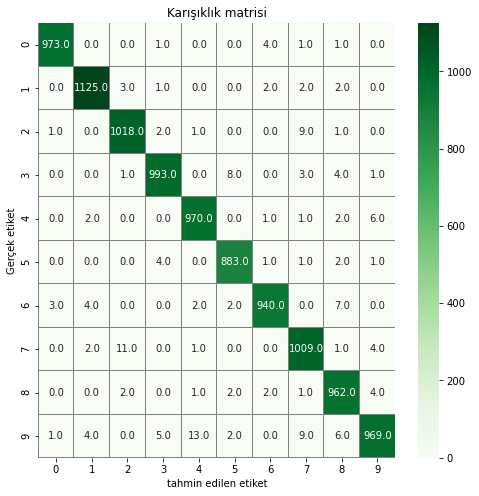

In [90]:
# test setinden tahmin et
y_pred = model.predict(x_test)

# tahmin edilen veriyi çevir
y_pred_class = np.argmax(y_pred,axis=1)

# test verisi çevir
y_true = np.argmax(y_test,axis=1)

# karışıklık matrisi hesaplama
confusion_mtx = confusion_matrix(y_true,y_pred_class)

# karşıklık matrisi çizdir
f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, cmap="Greens",linecolor="gray",fmt=".1f",ax=ax)
plt.xlabel("tahmin edilen etiket")
plt.ylabel("Gerçek etiket")
plt.title("Karışıklık matrisi")
plt.show()

# Tekrarlayan Sinir Ağları

## Keras İle Tekrarlayan Sinir Ağları

Veri Seti Tanıma

In [91]:
# veri setini yükleyelim
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [94]:
# veriyi içeri aktar
veri = pd.read_csv("international-airline-passengers.csv")
veri.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


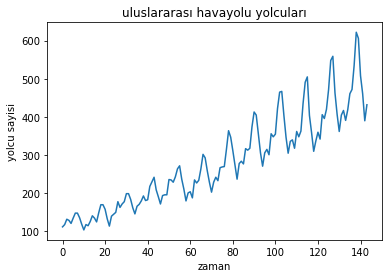

In [95]:
# veriyi görseleştirelim
veri = veri.iloc[:,1].values
plt.plot(veri)
plt.xlabel("zaman")
plt.ylabel("yolcu sayisi")
plt.title("uluslararası havayolu yolcuları")
plt.show()

In [97]:
# verilerin şeklini  ve veri tiplerini değiştir
veri = veri.reshape(-1,1)
veri = veri.astype("float32")
veri.shape

(145, 1)

In [98]:
# normalize edelim
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
veri_scaled = scaler.fit_transform(veri)
veri_scaled[:4]

array([[0.01544401],
       [0.02702703],
       [0.05405405],
       [0.04826255]], dtype=float32)

In [115]:
# veriyi eğitim ve test olarak bölelim
# verilerin %60'lık ilk kısmını eğitim kalanını da test icin ayırıyoruz
egitim_boyu = int(len(veri) * 0.60)
test_boyu = len(veri) - egitim_boyu
egitim = veri_scaled[0:egitim_boyu,:]
test = veri_scaled[egitim_boyu:len(veri),:]
print("Egitim boyu:{}, Test boyu:{}".format(len(egitim),len(test)))

Egitim boyu:87, Test boyu:58


In [119]:
# eğitim verisini 10'ar lı olarak yeniden şekilendirelim
time_stemp = 10
dataX = []
dataY = []
for i in range(len(egitim)-time_stemp-1):
    a = egitim[i:(i+time_stemp),0]
    dataX.append(a)
    dataY.append(egitim[i + time_stemp,0])
    
egitimX = np.array(dataX)
egitimY = np.array(dataY)

print(egitimX.shape)
print(egitimY.shape)

(76, 10)
(76,)


In [120]:
# eğitim verisini 10'ar lı olarak yeniden şekilendirelim
time_stemp = 10
dataX = []
dataY = []
for i in range(len(test)-time_stemp-1):
    a = test[i:(i+time_stemp),0]
    dataX.append(a)
    dataY.append(test[i + time_stemp,0])
    
testX = np.array(dataX)
testY = np.array(dataY)

print(testX.shape)
print(testY.shape)

(47, 10)
(47,)


In [121]:
# verilerin şeklini keras için uygun hale getirelim
egitimX = np.reshape(egitimX, (egitimX.shape[0], egitimX.shape[1],1))
testX = np.reshape(testX, (testX.shape[0],testX.shape[1],1))
print("Egitim X şekli: ",egitimX.shape)
print("Test X şekli: ",testX.shape)

Egitim X şekli:  (76, 10, 1)
Test X şekli:  (47, 10, 1)


## Create RNN Model

In [123]:
# gerekli kütüphane metodlarını içeri aktaralım
from keras.models import Sequential
from keras.layers import Dense,SimpleRNN,Dropout

# tekrarlayan sinir ağının temellerini oluşturur
regressor = Sequential()

# ilk katman ve dropout katmanı
regressor.add(SimpleRNN(units = 120,
                       activation = "relu", 
                       return_sequences = True,
                       input_shape = (egitimX.shape[1],1)))

regressor.add(Dropout(0.2))

# ikinci katman ve dropout katmanı
regressor.add(SimpleRNN(units = 80, 
                       activation="relu",
                       return_sequences=True))

regressor.add(Dropout(0.2))

# üçüncü katman ve dropout katmanı
regressor.add(SimpleRNN(units = 40, 
                       activation="relu",
                       return_sequences=True))

regressor.add(Dropout(0.2))


# dördüncü katman ve dropout katmanı
regressor.add(SimpleRNN(units = 20, 
                       activation="relu",
                       return_sequences=True))

regressor.add(Dropout(0.2))

# beşinci katman ve dropout katmanı
regressor.add(SimpleRNN(units = 10))
regressor.add(Dropout(0.2))

# tek bir çıkış olacak
regressor.add(Dense(units = 1))

# derliyoruz
regressor.compile(optimizer="adam", loss = "mean_squared_error")

# eğitim
regressor.fit(egitimX,egitimY,epochs=250, batch_size= 50,verbose=0)


### Tahminleme Ve Modelin Değerlendirilmesi

In [124]:
# gerekli kütüphaneleri ekleyelim
import math
from sklearn.metrics import mean_squared_error

egitimTahmin = regressor.predict(egitimX)
testTahmin = regressor.predict(testX)

# normalize edilmiş veriyi normale çevirelim
egitimTahmin = scaler.inverse_transform(egitimTahmin)
egitimY = scaler.inverse_transform([egitimY])

testTahmin = scaler.inverse_transform(testTahmin)
testY = scaler.inverse_transform([testY])

In [126]:
# kök ortalama kare hata
trainScore= math.sqrt(mean_squared_error(egitimY[0], egitimTahmin[:,0]))
print("Eğitim Skoru: %.2f RMSE" % (trainScore))

testScore= math.sqrt(mean_squared_error(testY[0], testTahmin[:,0]))
print("Eğitim Skoru: %.2f RMSE" % (testScore))

Eğitim Skoru: 19.24 RMSE
Eğitim Skoru: 60.79 RMSE


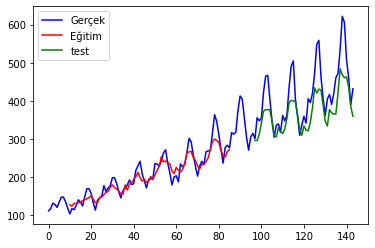

In [133]:
# eğitim verisi kaydır
trainPredictPlot = np.empty_like(veri)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[time_stemp:len(egitimTahmin)+time_stemp, :] = egitimTahmin

# test verisi kaydır
testPredictPlot = np.empty_like(veri)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(egitimTahmin)+(time_stemp*2)+1:len(veri)-1, :] = testTahmin


# görselleştir
plt.plot(scaler.inverse_transform(veri_scaled), color="b", label = "Gerçek")
plt.plot(trainPredictPlot, color="r", label= "Eğitim")
plt.plot(testPredictPlot, color= "g", label= "test")
plt.legend()
plt.show()